In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sys
plt.style.use('seaborn-v0_8')


In [2]:
df = pd.read_csv("mymoviedb.csv", engine='python')
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


Data cleantng

In [3]:
df.shape

(9837, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

In [7]:
# Drop rows where the 'Title' column is null
df = df.dropna(subset=['Title'])


In [8]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           1
Vote_Count           1
Vote_Average         1
Original_Language    1
Genre                2
Poster_Url           2
dtype: int64

In [9]:
missing_data = df[df.isnull().any(axis=1)]
missing_data

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1105,2013-10-20,Pixie Hollow Bake Off,Tink challenges Gelata to see who can bake the...,NaN,None,None,None,None,None
1115,- Magic Tricks,61.328,35,7.1,en,Animation,https://image.tmdb.org/t/p/original/6iXYe7AkQ1...,None,None


In [10]:
df.loc[1115]

Release_Date                                            - Magic Tricks
Title                                                           61.328
Overview                                                            35
Popularity                                                         7.1
Vote_Count                                                          en
Vote_Average                                                 Animation
Original_Language    https://image.tmdb.org/t/p/original/6iXYe7AkQ1...
Genre                                                             None
Poster_Url                                                        None
Name: 1115, dtype: object

In [11]:
df['Title'][1115] = "Magic Tricks"

C:\Users\rawan\AppData\Local\Temp\ipykernel_25016\3888272792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'][1115] = "Magic Tricks"


In [12]:
df.loc[1115, 'Title']

'Magic Tricks'

In [13]:
df.loc[1115]

Release_Date                                            - Magic Tricks
Title                                                     Magic Tricks
Overview                                                            35
Popularity                                                         7.1
Vote_Count                                                          en
Vote_Average                                                 Animation
Original_Language    https://image.tmdb.org/t/p/original/6iXYe7AkQ1...
Genre                                                             None
Poster_Url                                                        None
Name: 1115, dtype: object

In [14]:
#https://www.imdb.com/title/tt7148000/releaseinfo/
df['Release_Date'][1115] = "2016-10-21"

C:\Users\rawan\AppData\Local\Temp\ipykernel_25016\3389898956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Release_Date'][1115] = "2016-10-21"


In [15]:
df.loc[1115]

Release_Date                                                2016-10-21
Title                                                     Magic Tricks
Overview                                                            35
Popularity                                                         7.1
Vote_Count                                                          en
Vote_Average                                                 Animation
Original_Language    https://image.tmdb.org/t/p/original/6iXYe7AkQ1...
Genre                                                             None
Poster_Url                                                        None
Name: 1115, dtype: object

In [16]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

C:\Users\rawan\AppData\Local\Temp\ipykernel_25016\3045119262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Release_Date'] = pd.to_datetime(df['Release_Date'])


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9828 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9828 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Overview           9828 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   object        
 5   Vote_Average       9827 non-null   object        
 6   Original_Language  9827 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 1.0+ MB


In [18]:
df.T[1115]

Release_Date                                       2016-10-21 00:00:00
Title                                                     Magic Tricks
Overview                                                            35
Popularity                                                         7.1
Vote_Count                                                          en
Vote_Average                                                 Animation
Original_Language    https://image.tmdb.org/t/p/original/6iXYe7AkQ1...
Genre                                                             None
Poster_Url                                                        None
Name: 1115, dtype: object

In [19]:
df['Genre'][1115] = "Animation"

C:\Users\rawan\AppData\Local\Temp\ipykernel_25016\4250244007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre'][1115] = "Animation"


In [20]:
df['Original_Language'][1115] = "en"

C:\Users\rawan\AppData\Local\Temp\ipykernel_25016\2147869769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Original_Language'][1115] = "en"


In [21]:
df['Vote_Average'][1115] = "7.1"

C:\Users\rawan\AppData\Local\Temp\ipykernel_25016\1765840177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vote_Average'][1115] = "7.1"


In [22]:
df['Vote_Count'][1115] = "35"

C:\Users\rawan\AppData\Local\Temp\ipykernel_25016\2843834199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vote_Count'][1115] = "35"


In [23]:
df['Popularity'][1115] = "61.328"

C:\Users\rawan\AppData\Local\Temp\ipykernel_25016\2386643146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Popularity'][1115] = "61.328"


In [24]:
df['Overview'][1115] = "A frustrated writer searches for inspiration, a magician likes what they see. Who's the real enchanter?"

C:\Users\rawan\AppData\Local\Temp\ipykernel_25016\15660312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Overview'][1115] = "A frustrated writer searches for inspiration, a magician likes what they see. Who's the real enchanter?"


In [25]:
df.T[1115]

Release_Date                                       2016-10-21 00:00:00
Title                                                     Magic Tricks
Overview             A frustrated writer searches for inspiration, ...
Popularity                                                      61.328
Vote_Count                                                          35
Vote_Average                                                       7.1
Original_Language                                                   en
Genre                                                        Animation
Poster_Url                                                        None
Name: 1115, dtype: object

In [26]:
df['Vote_Count'][1105] = "596"

C:\Users\rawan\AppData\Local\Temp\ipykernel_25016\1324227093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vote_Count'][1105] = "596"


In [27]:
df['Vote_Average'][1105] = "6.7"

C:\Users\rawan\AppData\Local\Temp\ipykernel_25016\760133549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vote_Average'][1105] = "6.7"


In [28]:
df.T[1105]

Release_Date                                       2013-10-20 00:00:00
Title                                            Pixie Hollow Bake Off
Overview             Tink challenges Gelata to see who can bake the...
Popularity                                                         NaN
Vote_Count                                                         596
Vote_Average                                                       6.7
Original_Language                                                 None
Genre                                                             None
Poster_Url                                                        None
Name: 1105, dtype: object

In [29]:
df['Original_Language'][1105] = "en"

C:\Users\rawan\AppData\Local\Temp\ipykernel_25016\4134668663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Original_Language'][1105] = "en"


In [30]:
df['Genre'][1105] = "Animation"

C:\Users\rawan\AppData\Local\Temp\ipykernel_25016\2534449787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre'][1105] = "Animation"


In [31]:
df.T[1105]

Release_Date                                       2013-10-20 00:00:00
Title                                            Pixie Hollow Bake Off
Overview             Tink challenges Gelata to see who can bake the...
Popularity                                                         NaN
Vote_Count                                                         596
Vote_Average                                                       6.7
Original_Language                                                   en
Genre                                                        Animation
Poster_Url                                                        None
Name: 1105, dtype: object

In [32]:
df['Popularity'][1105] = "13.356"

C:\Users\rawan\AppData\Local\Temp\ipykernel_25016\1077045638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Popularity'][1105] = "13.356"


In [33]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           2
dtype: int64

In [34]:
df = df.drop(columns=['Poster_Url'])

In [35]:
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime"
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror"
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History"


In [36]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64

In [37]:
df["Popularity"] = df["Popularity"].astype(float)
df["Vote_Count"] = df["Vote_Count"].astype(float)
df["Vote_Average"] = df["Vote_Average"].astype(float)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9828 entries, 0 to 9836
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9828 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Overview           9828 non-null   object        
 3   Popularity         9828 non-null   float64       
 4   Vote_Count         9828 non-null   float64       
 5   Vote_Average       9828 non-null   float64       
 6   Original_Language  9828 non-null   object        
 7   Genre              9828 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 949.1+ KB


In [39]:
df.to_csv('movie_clean.csv', index=False)

# EDA

# 1) what is the movie with highest popularity?

In [40]:
sorted_df=df.sort_values(by='Popularity',ascending=False)
sorted_df.head(10)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War"
5,2022-01-07,The Commando,An elite DEA agent returns home after a failed...,1750.484,33.0,6.6,en,"Action, Crime, Thriller"
6,2022-01-12,Scream,Twenty-five years after a streak of brutal mur...,1675.161,821.0,6.8,en,"Horror, Mystery, Thriller"
7,2022-02-10,Kimi,A tech worker with agoraphobia discovers recor...,1601.782,206.0,6.3,en,Thriller
8,2022-02-17,Fistful of Vengeance,A revenge mission becomes a fight to save the ...,1594.013,114.0,5.3,en,"Action, Crime, Fantasy"
9,2021-11-03,Eternals,The Eternals are a team of ancient aliens who ...,1537.406,4726.0,7.2,en,Science Fiction


[Text(0.5, 1.0, 'The Most Popular Movies')]

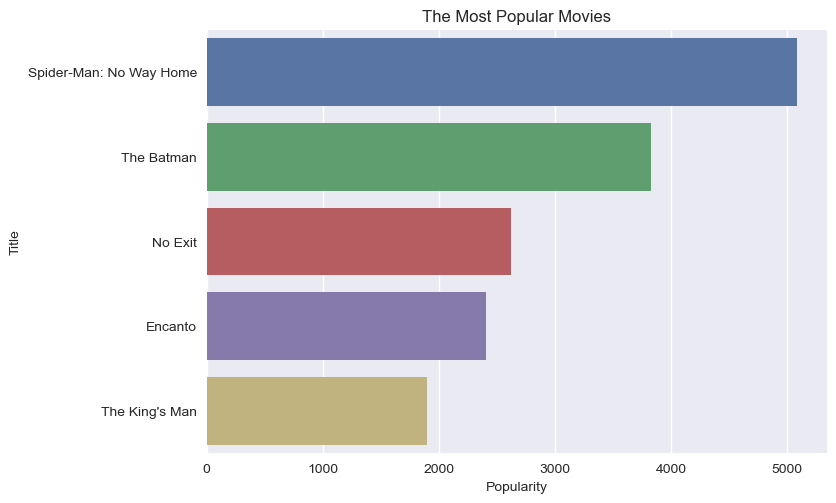

In [41]:
sns.barplot(data=sorted_df.head(5), y='Title', x='Popularity').set(title="The Most Popular Movies")

# 2) what is the movie with lowest popularity?

In [42]:
lowest_popularity=df.sort_values(by='Popularity',ascending=True)
lowest_popularity.head(10)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
9836,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186.0,7.8,en,"War, Drama, Science Fiction"
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152.0,6.7,en,"Music, Drama, History"
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94.0,5.0,en,"Mystery, Thriller, Horror"
1105,2013-10-20,Pixie Hollow Bake Off,Tink challenges Gelata to see who can bake the...,13.356,596.0,6.7,en,Animation
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8.0,3.5,es,Horror
9831,1974-11-06,The Little Prince,"Based on the story by Antoine deSaint-Exupery,...",13.357,89.0,6.6,en,"Science Fiction, Fantasy, Family, Music"
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896.0,7.6,en,"Drama, Crime"
9830,1992-06-26,Unlawful Entry,"After a break-in at their house, a couple gets...",13.358,199.0,6.1,en,"Crime, Thriller, Mystery"
9829,2008-05-13,Amateur Porn Star Killer 2,Shane Ryan's sequel to the disturbing Amateur ...,13.359,14.0,5.4,en,"Crime, Horror"
9828,2013-08-23,All Is Lost,"During a solo voyage in the Indian Ocean, a ve...",13.359,1319.0,6.6,en,"Action, Adventure, Drama"


[Text(0.5, 1.0, 'The lowest Popular Movies')]

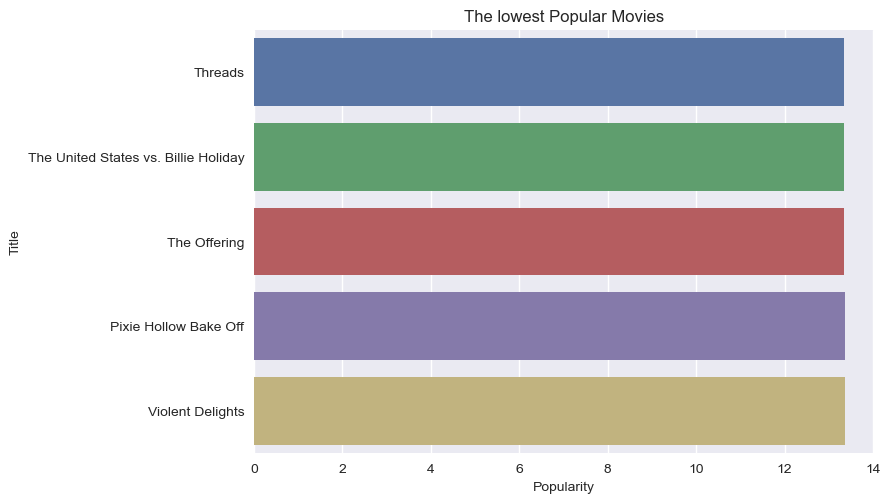

In [43]:
sns.barplot(data=lowest_popularity.head(5), y='Title', x='Popularity').set(title="The lowest Popular Movies")

# Comparison between the highest and lowest Popularity

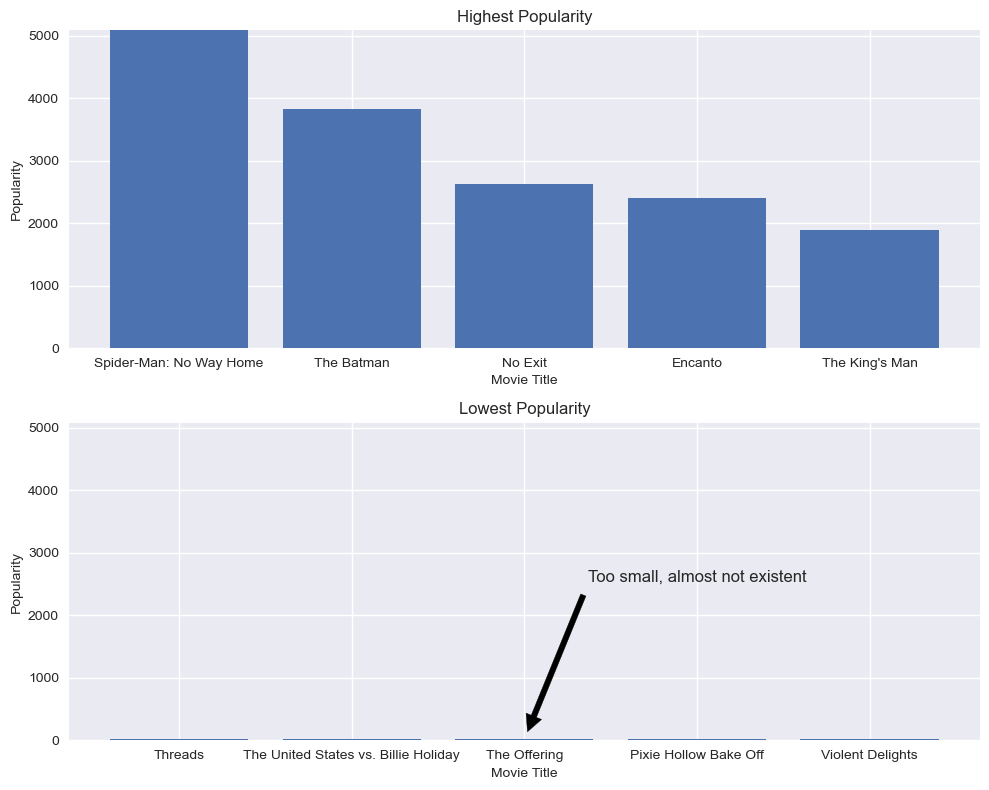

In [72]:
figure, axis = plt.subplots(2, 1, figsize=(10, 8))

max_popularity = max(sorted_df['Popularity'].max(), lowest_popularity['Popularity'].max())

axis[0].bar(sorted_df['Title'].head(5), sorted_df['Popularity'].head(5))
axis[0].set_title("Highest Popularity")
axis[0].set_ylabel('Popularity')
axis[0].set_xlabel('Movie Title')
axis[0].set_ylim(0, max_popularity)


axis[1].bar(lowest_popularity['Title'].head(5), lowest_popularity['Popularity'].head(5))
axis[1].set_title("Lowest Popularity")
axis[1].set_ylabel('Popularity')
axis[1].set_xlabel('Movie Title')
axis[1].set_ylim(0, max_popularity)

axis[1].annotate('Too small, almost not existent',
                 xy=(2, lowest_popularity['Popularity'].min()),  # Position of the annotation
                 xytext=(3, max_popularity * 0.5),  # Text position (adjust this as needed)
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=12,
                 ha='center')


# Adjust layout to prevent overlap
plt.tight_layout()


plt.show()

# 3) What is the most film Genre ?

In [45]:
count_genre=df['Genre'].value_counts()
count_genre.head(10)

Drama                     466
Comedy                    403
Drama, Romance            248
Horror                    238
Horror, Thriller          199
Comedy, Romance           196
Documentary               139
Comedy, Drama             137
Action, Thriller          125
Comedy, Drama, Romance    107
Name: Genre, dtype: int64

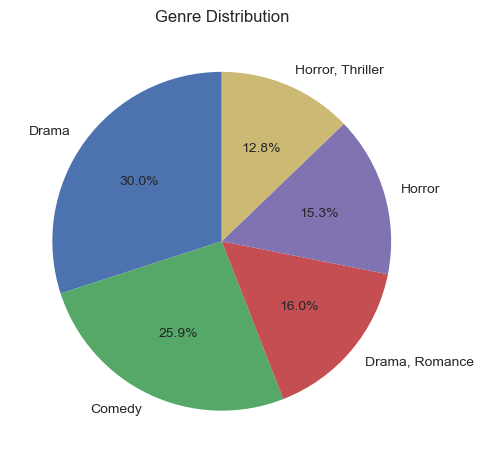

In [46]:
c = sns.color_palette("flare")
plt.pie(count_genre.head(5), labels=count_genre.head(5).index, autopct='%1.1f%%', startangle=90)
plt.title('Genre Distribution')
plt.show()

In [47]:
df1 = df.copy()
df1['Genre'] = df1['Genre'].str.split(', ')
df1 = df1.explode('Genre')
df1.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,Action
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,Adventure
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,Science Fiction
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,Crime
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,Mystery


In [48]:
df1['Genre'].value_counts().index

Index(['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance',
       'Horror', 'Animation', 'Family', 'Fantasy', 'Science Fiction', 'Crime',
       'Mystery', 'History', 'War', 'Music', 'Documentary', 'TV Movie',
       'Western'],
      dtype='object')

In [49]:
df1["Genre"].value_counts()

Drama              3744
Comedy             3031
Action             2686
Thriller           2488
Adventure          1853
Romance            1476
Horror             1470
Animation          1440
Family             1414
Fantasy            1308
Science Fiction    1273
Crime              1242
Mystery             773
History             427
War                 308
Music               295
Documentary         215
TV Movie            214
Western             137
Name: Genre, dtype: int64

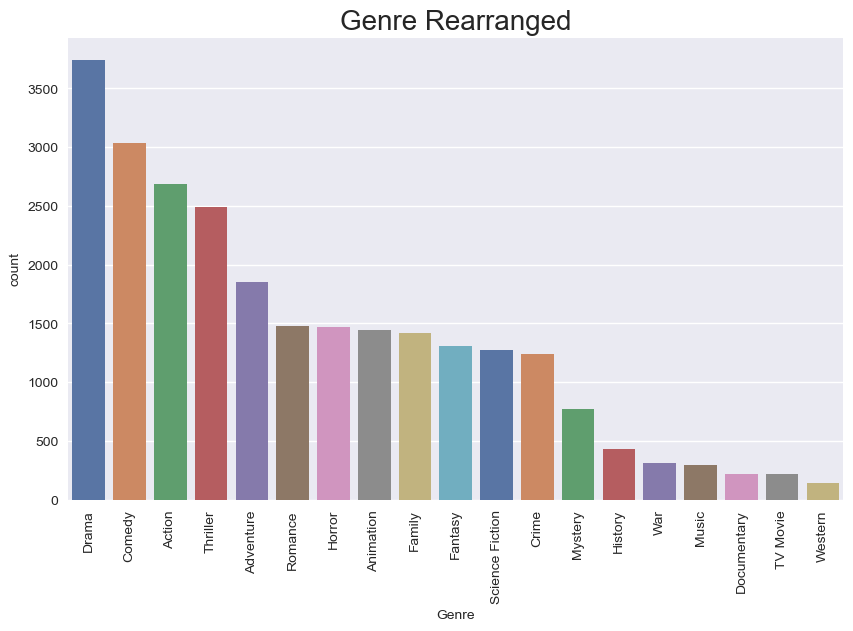

In [68]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x = 'Genre', data = df1, order = df1['Genre'].value_counts().index,palette='deep')
plt.xticks(rotation = 90)
plt.title('Genre Rearranged', fontsize = 20)

plt.show()

# 4) What year was the largest number of films produced?

In [51]:
years=df['Release_Date'].dt.year
year=years.value_counts()

year.head(10)

2021    714
2018    530
2017    510
2019    500
2016    471
2020    453
2015    390
2014    371
2013    348
2011    316
Name: Release_Date, dtype: int64

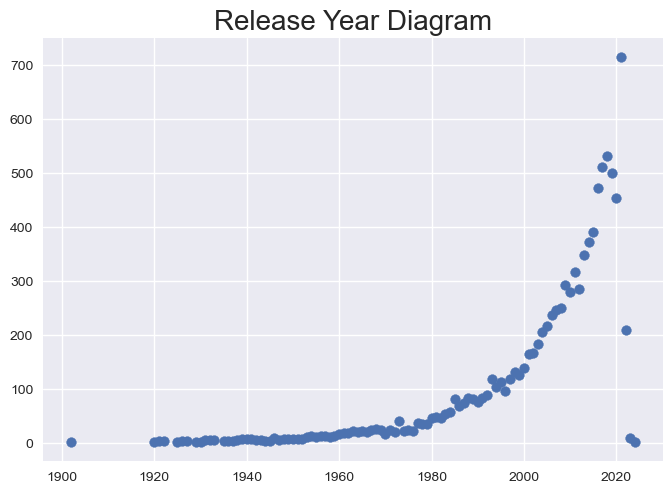

In [84]:
plt.scatter(year.index,year)
plt.title('Release Year Diagram', fontsize = 20)
plt.show()

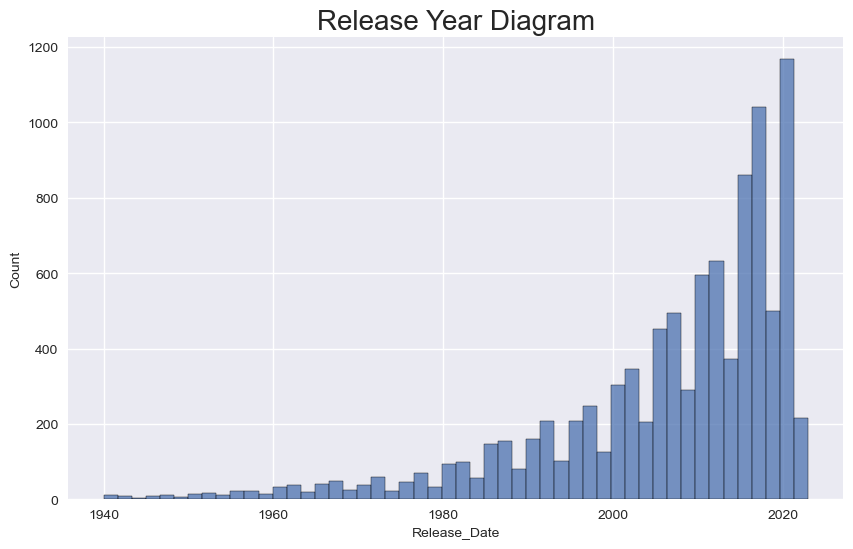

In [52]:
fig, ax = plt.subplots(figsize = (10,6)) #error line
sns.histplot(x = years, bins = 50, binrange = (1940, 2023))
plt.title('Release Year Diagram', fontsize = 20)
plt.show()

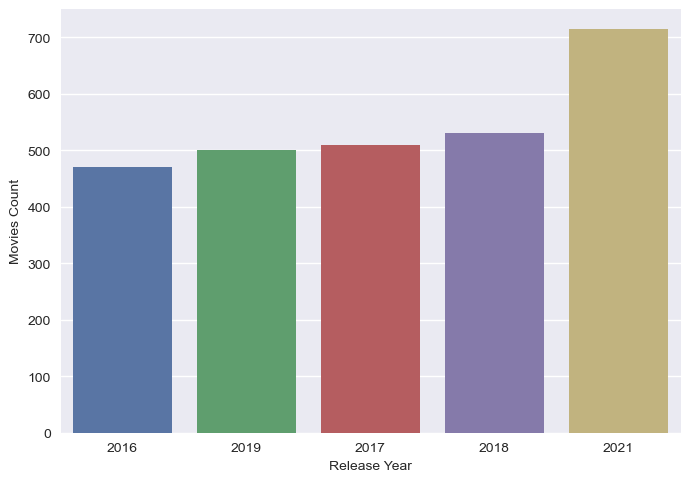

In [74]:
years = df.Release_Date.dt.year.value_counts().nlargest(5).sort_values()
sns.barplot(x=years.index, y=years.values , order=years.index)
plt.xlabel("Release Year")
plt.ylabel("Movies Count")
plt.show()


# 5) What is the movies that takes the highest rating?

In [54]:
highest_avg_rate=df.sort_values(by='Vote_Average',ascending=False)
highest_avg_rate.head(10)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
9401,2020-04-09,Kung Fu Master Huo Yuanjia,The young and vigorous Huo Yuanjia was only fo...,13.745,1.0,10.0,zh,"Action, Drama"
7349,2018-06-08,Franco Escamilla: Por La Anécdota,Mexican stand-up comedian Franco Escamilla dra...,16.158,92.0,9.2,es,Comedy
667,2019-03-29,Demon Slayer: Kimetsu no Yaiba Sibling's Bond,Tanjiro finds his family slaughtered and the l...,86.689,27.0,9.1,ja,"Action, Animation, Fantasy"
2335,2021-06-17,Impossible Things,A widow who is tormented by the memory of her ...,36.466,82.0,9.1,es,"Family, Drama"
7411,2020-10-30,My Sex Doll,The story of chaos both body and mind occurs w...,16.088,4.0,9.0,th,"Comedy, Romance"
7024,2018-05-16,Sex School: Dorms of Desire,"Boning up for the finals, the girls of CSU won...",16.683,1.0,9.0,en,Comedy
6738,2021-11-18,Mission «Sky»,In the center of the story are three main char...,17.133,34.0,9.0,ru,"Drama, War"
2401,2020-10-14,The Three Deaths of Marisela Escobedo,Follows a mother's tireless crusade to jail he...,35.767,183.0,9.0,es,"Documentary, Crime"
7049,2019-08-07,Bring the Soul: The Movie,"Following their landmark “Love Yourself” tour,...",16.652,323.0,8.9,ko,"Music, Documentary"
5079,2021-08-19,"Ni tuyo, Ni mía",Amanda realizes that her perfect husband is ha...,20.696,49.0,8.9,es,Drama


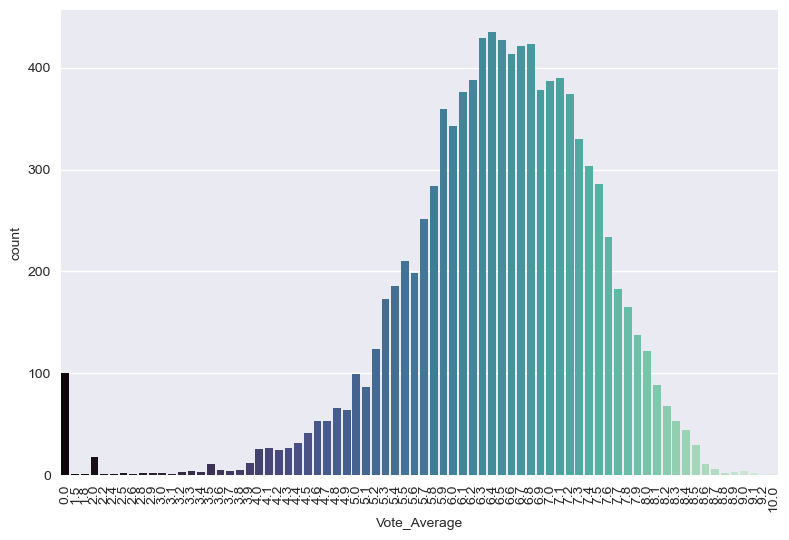

In [70]:
sns.countplot(x=df["Vote_Average"],palette="mako")
plt.xticks(rotation = 90)
fig.subplots_adjust(bottom=0.5)
plt.tight_layout()
plt.show()

<Axes: xlabel='Vote_Average', ylabel='Count'>

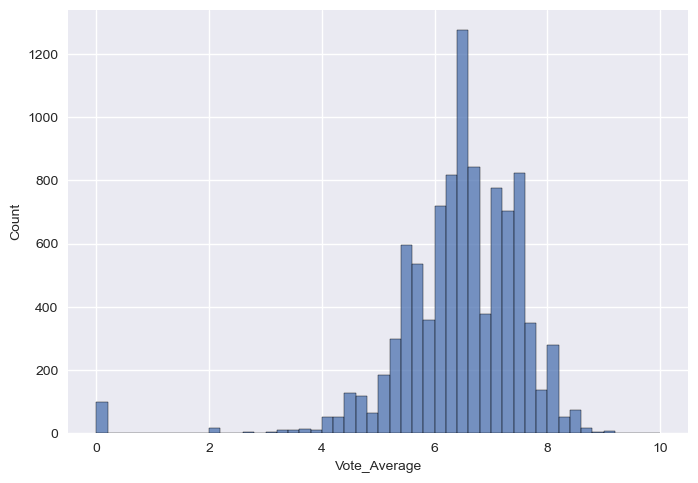

In [56]:
sns.histplot(x = df["Vote_Average"], bins = 50)

### the votes less than 200 are not reliable due to the distribution of vote average so an assumption is made .

In [57]:
highest_avg_rate = highest_avg_rate[highest_avg_rate['Vote_Count']>200] #note
highest_avg_rate.head(10)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
7049,2019-08-07,Bring the Soul: The Movie,"Following their landmark “Love Yourself” tour,...",16.652,323.0,8.9,ko,"Music, Documentary"
8657,2018-11-15,Burn the Stage: The Movie,Burn the Stage: The Movie is the first movie f...,14.471,332.0,8.9,ko,"Documentary, Music"
609,1972-03-14,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",93.136,15614.0,8.7,en,"Drama, Crime"
657,1994-09-23,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,87.669,20911.0,8.7,en,"Drama, Crime"
3156,1995-10-20,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",29.087,3474.0,8.7,hi,"Comedy, Drama, Romance"
1007,1974-12-20,The Godfather: Part II,In the continuing saga of the Corleone crime f...,65.324,9393.0,8.6,en,"Drama, Crime"
9210,2021-02-26,Billie Eilish: The World's a Little Blurry,This documentary offers a deeply intimate look...,13.956,222.0,8.6,en,"Documentary, Music"
4196,2020-11-19,Gabriel's Inferno Part III,The final part of the film adaption of the ero...,23.690,946.0,8.6,en,"Romance, Comedy"
1327,1993-11-30,Schindler's List,The true story of how businessman Oskar Schind...,55.225,12474.0,8.6,en,"Drama, History, War"
7008,2016-02-20,Dou kyu sei – Classmates,"Rihito Sajo, an honor student with a perfect s...",16.708,209.0,8.6,ja,"Romance, Animation"


<Axes: xlabel='Vote_Average', ylabel='Title'>

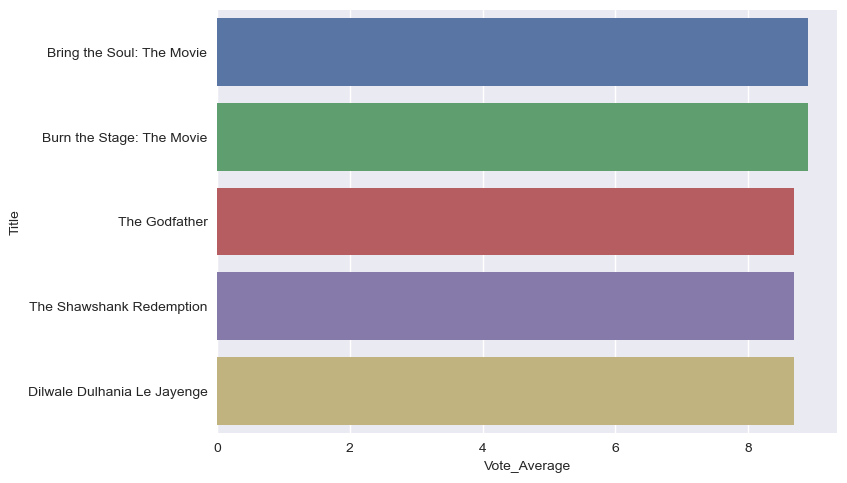

In [58]:
sns.barplot(data= highest_avg_rate.head(5),
            y= highest_avg_rate['Title'].head(5),
            x=highest_avg_rate['Vote_Average'].head(5))

# 6) What kind of movies take the lowest rating?

In [59]:
lowest_rate = highest_avg_rate.sort_values(by='Vote_Average',ascending=True)
lowest_rate.head(10)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
1305,2009-03-12,Dragonball Evolution,The young warrior Son Goku sets out on a quest...,55.831,1623.0,2.8,en,"Action, Adventure, Fantasy, Science Fiction, T..."
6456,2005-01-28,Alone in the Dark,Edward Carnby is a private investigator specia...,17.664,450.0,3.2,en,"Action, Fantasy, Horror"
8739,2003-04-11,House of the Dead,"Set on an island off the coast, a techno rave ...",14.392,287.0,3.2,en,"Horror, Action, Thriller"
6626,1978-12-01,The Star Wars Holiday Special,Luke Skywalker and Han Solo battle evil Imperi...,17.327,348.0,3.3,en,"Adventure, Comedy, Family, Science Fiction, TV..."
7391,2008-08-29,Disaster Movie,"The filmmaking team behind the hits ""Scary Mov...",16.109,809.0,3.3,en,Comedy
6716,2011-10-18,Hellraiser: Revelations,Two friends in Mexico discover the Lament Conf...,17.170,206.0,3.7,en,Horror
3358,2015-05-22,The Human Centipede 3 (Final Sequence),Taking inspiration from The Human Centipede fi...,27.803,564.0,3.7,en,Horror
3871,2007-01-25,Epic Movie,"When Edward, Peter, Lucy and Susan each follow...",25.102,1201.0,3.9,en,"Comedy, Action, Adventure"
9324,2013-07-11,Sharknado,"A freak hurricane hits Los Angeles, causing ma...",13.820,1293.0,3.9,en,"Fantasy, Horror, Action, Comedy, TV Movie, Sci..."
3342,1987-07-17,Jaws: The Revenge,"After another deadly shark attack, Ellen Brody...",27.950,758.0,4.0,en,"Adventure, Thriller, Horror"


<Axes: xlabel='Vote_Average', ylabel='Title'>

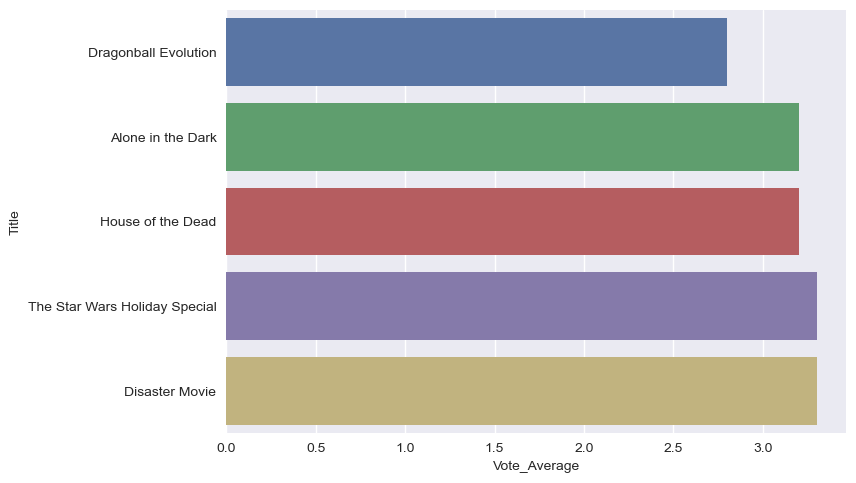

In [60]:
sns.barplot(data= lowest_rate.head(5),
            y= lowest_rate['Title'].head(5),
            x=lowest_rate['Vote_Average'].head(5))

# Comparison between the highest and lowest rating

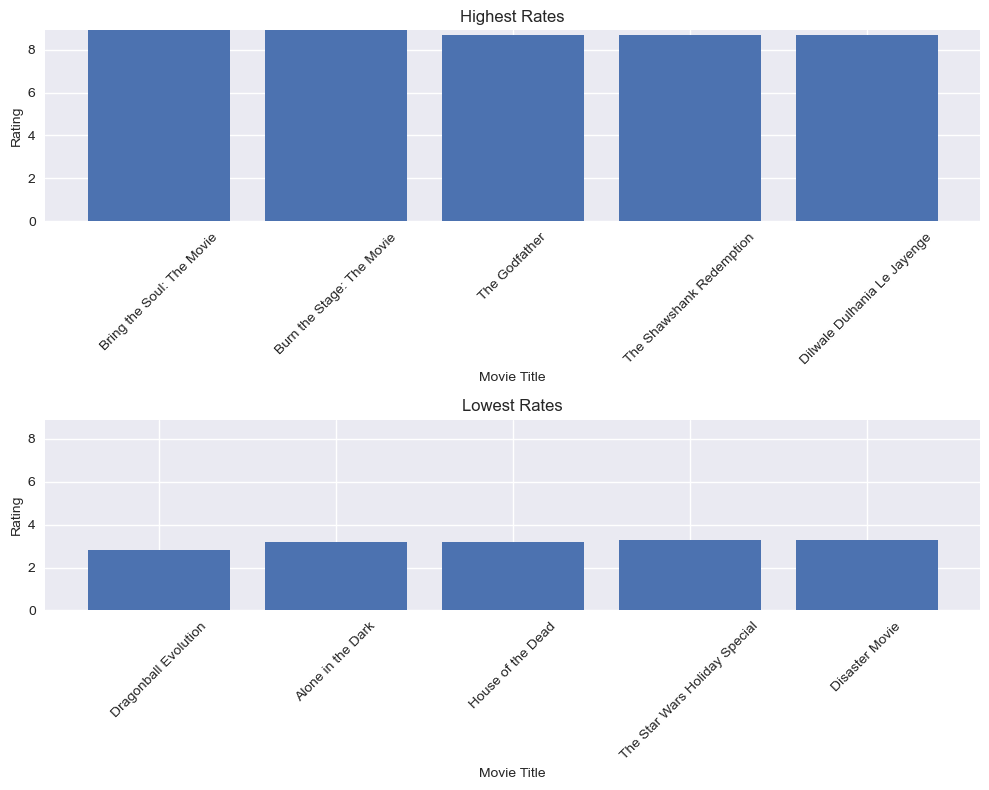

In [61]:
figure, axis = plt.subplots(2, 1, figsize=(10, 8))

max_rate = max(highest_avg_rate['Vote_Average'].max(), lowest_rate['Vote_Average'].max())

axis[0].bar(highest_avg_rate['Title'].head(5), highest_avg_rate['Vote_Average'].head(5),)
axis[0].set_title("Highest Rates")
axis[0].set_ylabel('Rating')
axis[0].set_xlabel('Movie Title')
axis[0].set_ylim(0, max_rate)
axis[0].tick_params(axis='x', rotation=45)


axis[1].bar(lowest_rate['Title'].head(5), lowest_rate['Vote_Average'].head(5))
axis[1].set_title("Lowest Rates")
axis[1].set_ylabel('Rating')
axis[1].set_xlabel('Movie Title',)
axis[1].set_ylim(0, max_rate)
axis[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()


plt.show()

# 7) Which language is most frequently used in movies?

In [62]:
language_counts = df['Original_Language'].value_counts()
language_counts.head(10)

en    7571
ja     645
es     339
fr     292
ko     170
zh     129
it     123
cn     109
ru      83
de      82
Name: Original_Language, dtype: int64

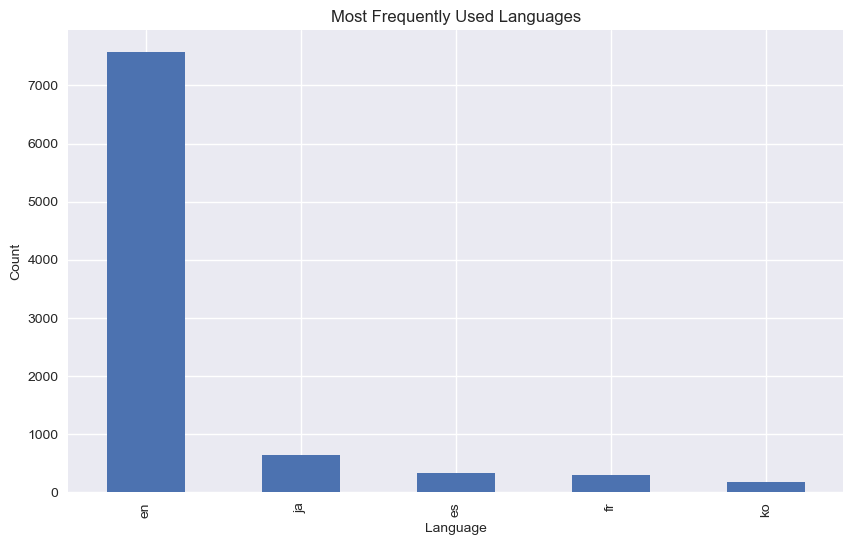

In [63]:
plt.figure(figsize=(10, 6))
language_counts.head(5).plot(kind='bar')
plt.title('Most Frequently Used Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 8) Top 5 rated movies in each genre

In [64]:
df2 = df.copy()
df2["Genre"] = df2["Genre"].str.split(',').apply(lambda x: [genre.strip() for genre in x])
genres = df2["Genre"].explode().str.get_dummies().groupby(level=0).max().astype(bool)
df2 = df2.join(genres).drop("Genre", axis=1)
df2.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,True,True,False,...,False,False,False,False,False,True,False,False,False,False
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,True,True,False,...,False,False,False,False,False,False,False,True,True,False


In [65]:
gens = genres.columns

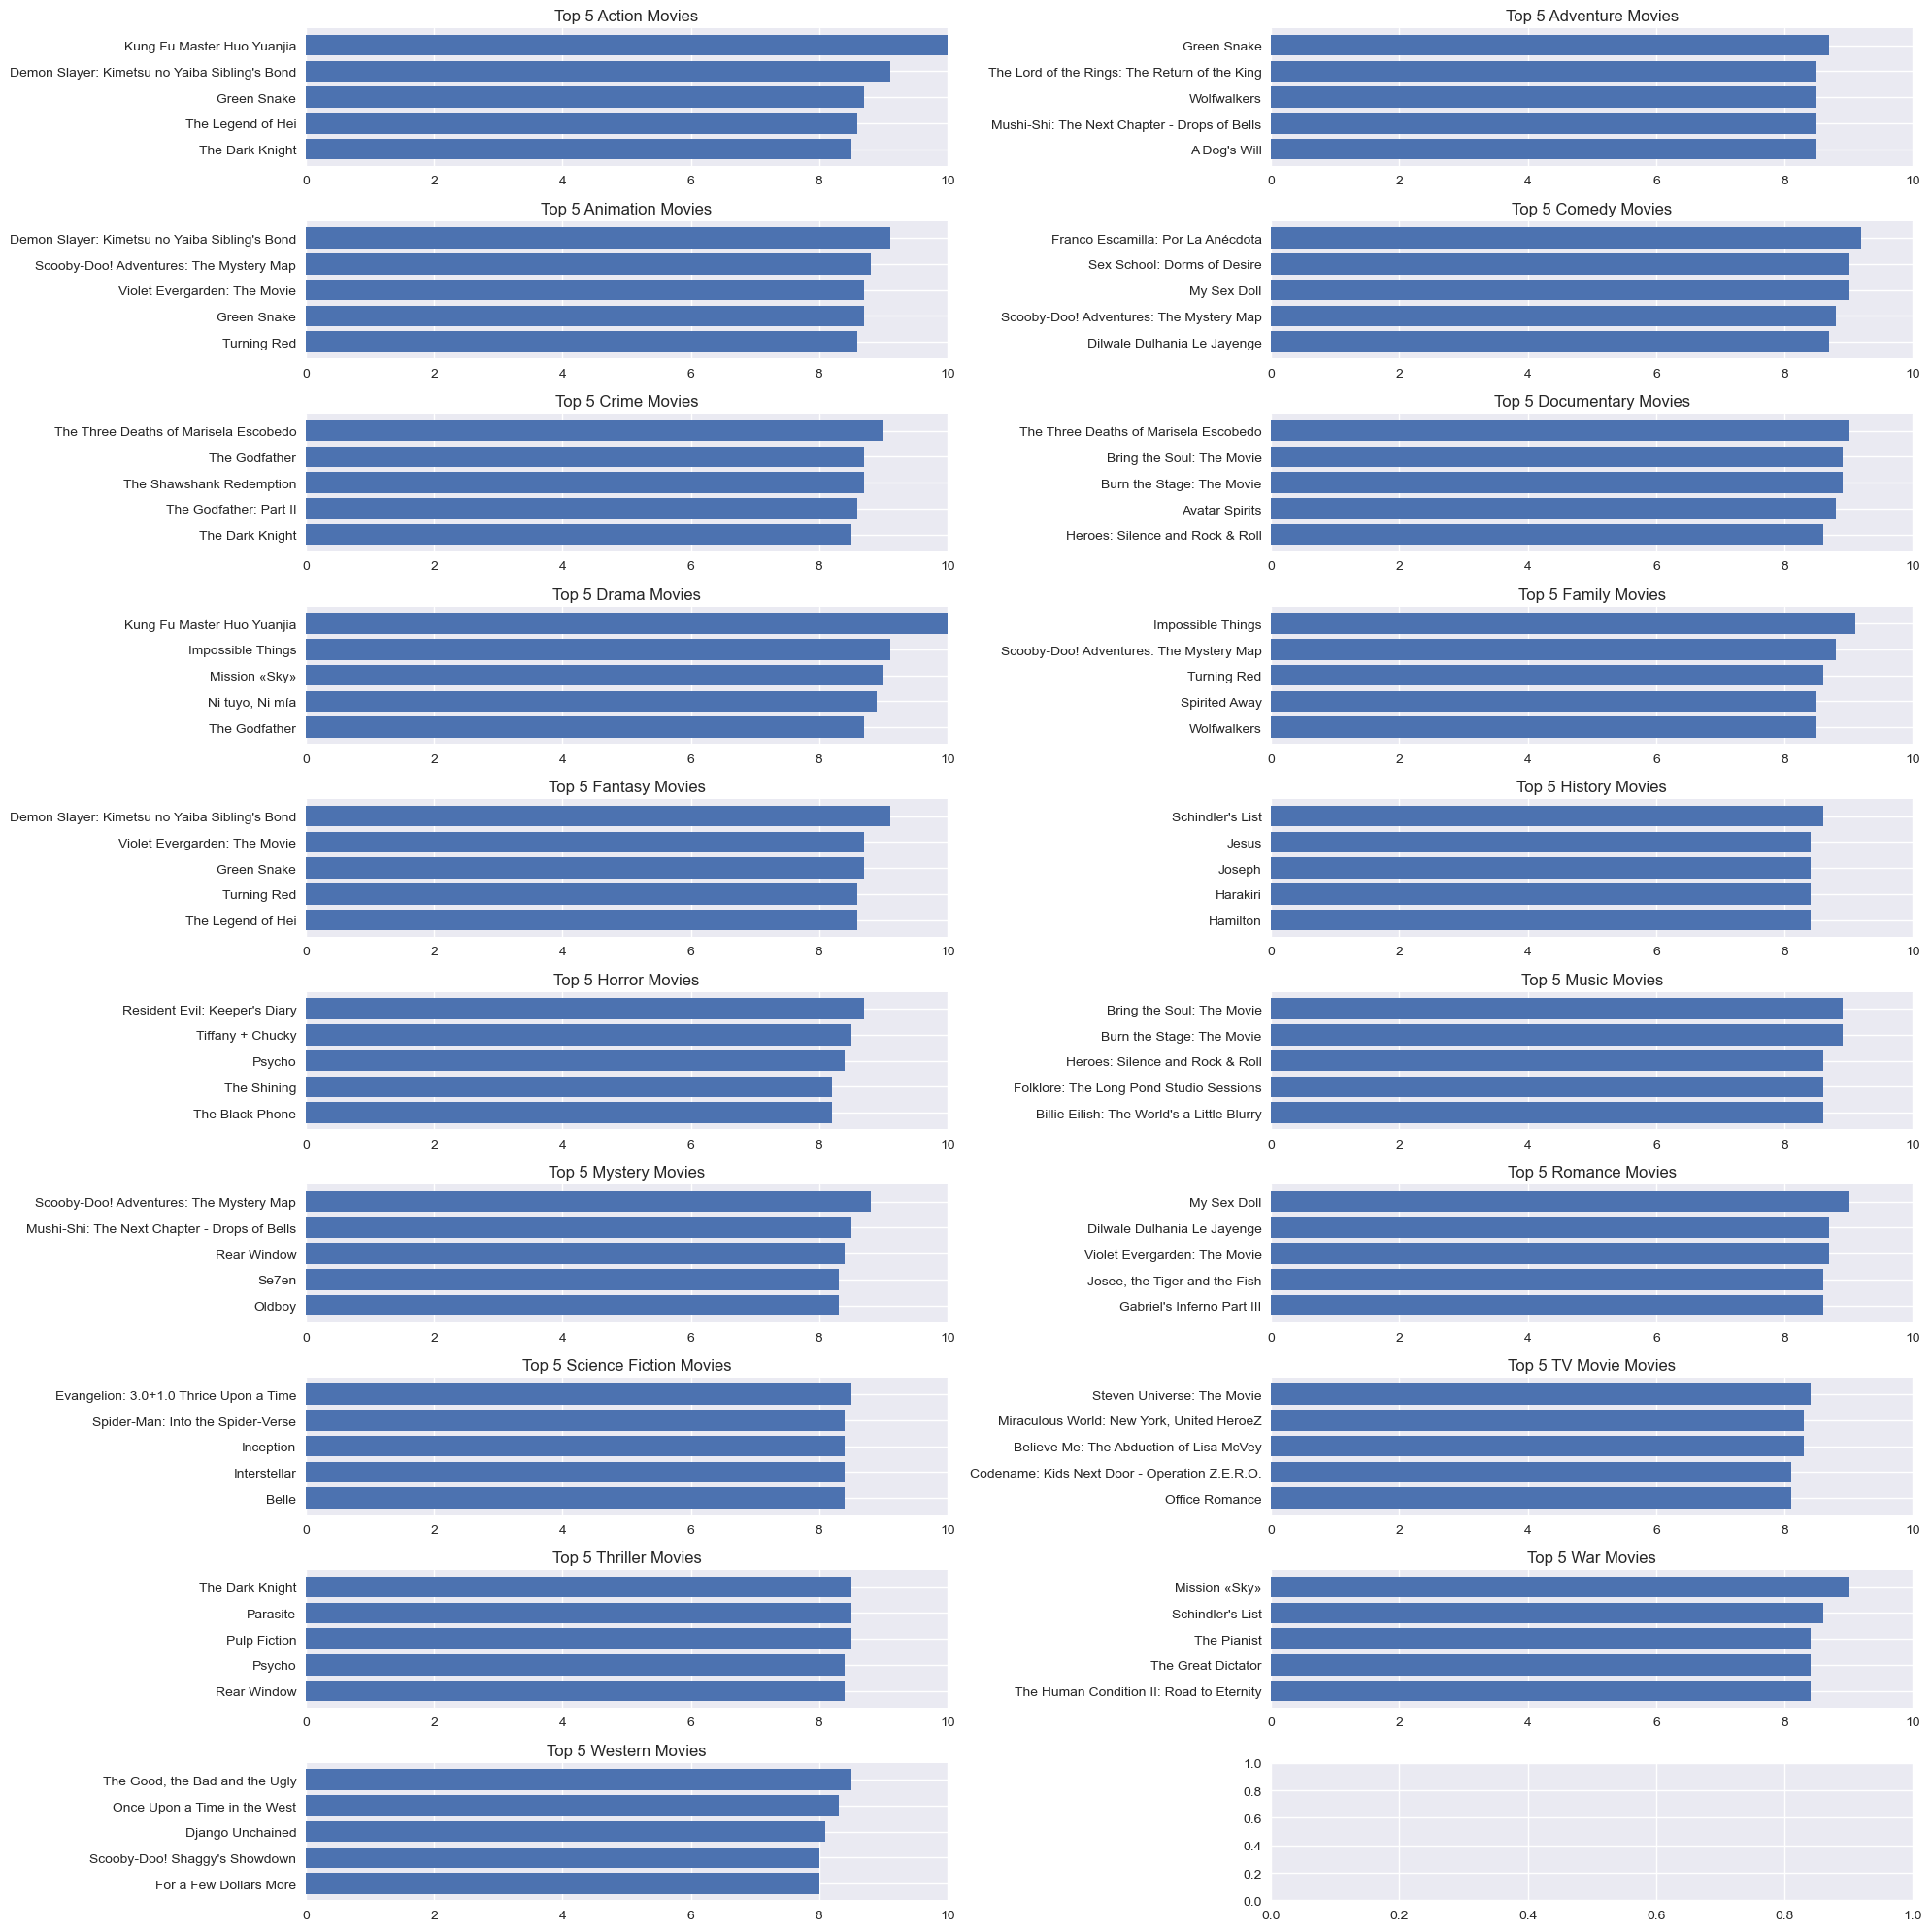

In [67]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 20))
axes = axes.flatten()

# Iterate over each genre and plot the top 5 rated movies
for i, genre in enumerate(gens):
    top5 = df2[df2[genre]].nlargest(5, 'Vote_Average')[['Title', 'Vote_Average']]
    axes[i].barh(top5['Title'], top5['Vote_Average'])
    axes[i].set_title(f'Top 5 {genre} Movies')
    axes[i].invert_yaxis()
    
    # Set the same x-axis limit for all subplots
    axes[i].set_xlim(0, 10)
    
plt.tight_layout()
plt.show()

# summary :